In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats
from scipy.stats import randint, uniform


In [2]:
from pathlib import Path
import tensorflow as tf 

## IMPORT & EXPLORE

#### FUNCTIONS

In [3]:
def directory_files(directory, item_type=None):
    return sorted([str(path) for path in directory.rglob(f'*.{item_type}')])

In [4]:
def load_images(image_paths, target_size=(224, 224)):
    loaded_images = []
    for path in image_paths:
        try:
            image = tf.io.read_file(path)
            image = tf.image.decode_image(image, channels=3)  # Keep RGB

            image = tf.image.resize(image, target_size)
            image = image / 255.0  # Normalize

            image.set_shape((target_size[0], target_size[1], 3))  # RGB shape

            loaded_images.append(image)
        except Exception as e:
            print(f"Error loading image at {path}: {e}")

    return loaded_images


In [5]:
def display_examples(images, labels, num_examples=5):
    plt.figure(figsize=(10, 10))
    
    for i in range(num_examples):
        ax = plt.subplot(1, num_examples, i + 1)
        ax.imshow(images[i])  # Display the image
        ax.set_title(f"Label: {labels[i]}")  # Display the label
        ax.axis("off")  # Hide axes
    
    plt.show()

#### DATA

In [6]:
tshirt_image_dir = Path(r"C:\Users\User\Downloads\data\images\lamoda_images_tshirt")
tshirt_image_paths = directory_files(tshirt_image_dir, item_type='jpg')  # Change to 'png' or others if needed

In [7]:
tshirt_image_ids = [i for i in range(len(tshirt_image_paths))]

In [8]:
tshirt_image_ids

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [9]:
tshirt_images = load_images(tshirt_image_paths, 
                            target_size=(224,224))

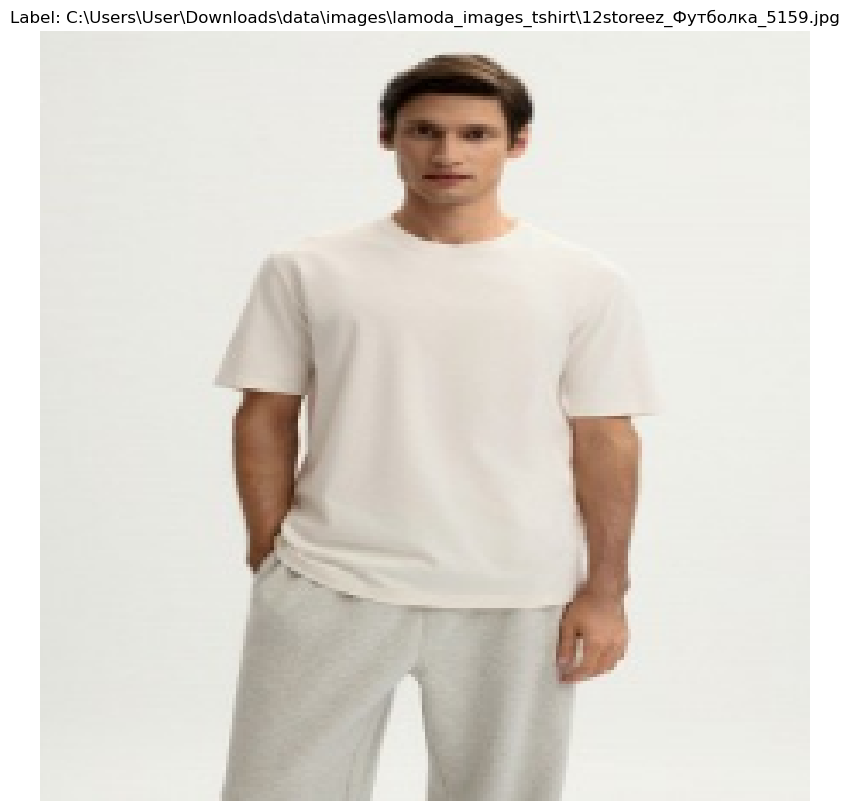

In [10]:
display_examples( images = tshirt_images,
                  labels = tshirt_image_paths,
                  num_examples = 1)

## MODEL BUILD

#### MODEL

In [12]:
from tensorflow.keras import models, applications, layers

In [13]:
fashion_conv_autoencoder52t = models.load_model(r"C:\Users\User\Downloads\fashion_conv_autoencoder52t.keras")

In [14]:
fashion_conv_autoencoder52t.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 112, 112, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 56, 56, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 56, 56, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 56, 56, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_4 (UpSampling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_5 (UpSampling2D)       │ (None, 224, 224, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 224, 224, 3)         │           1,731 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 156,203 (610.17 KB)

 Trainable params: 52,067 (203.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 104,136 (406.79 KB)

In [25]:
fashion_conv_encoder_layers = []


for layer in fashion_conv_autoencoder52t.layers:

    fashion_conv_encoder_layers.append(layer)

    if layer.name == "max_pooling2d_5":
        break


In [29]:

fashion_conv_encoder_gap = models.Sequential([ *fashion_conv_encoder_layers,
                                               layers.GlobalAveragePooling2D()])

In [30]:
fashion_conv_encoder_gap.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 112, 112, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 56, 56, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ ?                           │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,880 (97.19 KB)

 Trainable params: 24,880 (97.19 KB)

 Non-trainable params: 0 (0.00 B)

#### EMBEDINGS

In [32]:
tshirt_embedings = fashion_conv_encoder_gap.predict( tf.stack(tshirt_images) )

57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step


In [33]:
tshirt_embedings.shape

(1799, 16)

In [34]:
# Convert embeddings to DataFrame (assumes 2D array-like structure)
tshirt_embedings_df = pd.DataFrame(tshirt_embedings).astype(np.float64)

# Add image paths as a column
tshirt_embedings_df["image_path"] = tshirt_image_paths

In [35]:
print(tshirt_embedings_df.dtypes)

0             float64
1             float64
2             float64
3             float64
4             float64
5             float64
6             float64
7             float64
8             float64
9             float64
10            float64
11            float64
12            float64
13            float64
14            float64
15            float64
image_path     object
dtype: object


In [36]:
tshirt_embedings_df.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,image_path
748,0.280041,0.202225,0.138655,0.210801,0.240558,0.134459,0.0,0.511397,0.378832,0.681150,0.050808,0.200976,0.130673,0.770354,0.355963,0.200827,C:\Users\User\Downloads\data\images\lamoda_ima...
1677,0.378485,0.297085,0.210776,0.193130,0.220739,0.211816,0.0,0.401690,0.273418,0.550729,0.021986,0.310607,0.177628,0.630485,0.295719,0.270729,C:\Users\User\Downloads\data\images\lamoda_ima...
1321,0.295631,0.230896,0.156410,0.200571,0.246927,0.144532,0.0,0.501162,0.342190,0.656753,0.020749,0.221002,0.148912,0.749345,0.341405,0.224705,C:\Users\User\Downloads\data\images\lamoda_ima...
967,0.375448,0.352295,0.276093,0.198439,0.242500,0.249127,0.0,0.399687,0.312594,0.530465,0.028435,0.351353,0.205686,0.608734,0.310117,0.272828,C:\Users\User\Downloads\data\images\lamoda_ima...
1517,0.257907,0.155640,0.084641,0.190124,0.237148,0.097141,0.0,0.515926,0.344926,0.696339,0.027245,0.167556,0.122192,0.781195,0.340719,0.229052,C:\Users\User\Downloads\data\images\lamoda_ima...


#### CLUSTERLING

In [37]:
from sklearn.cluster import KMeans

In [38]:

clustering_results = []

for k in range(5,250):

    kmeans = KMeans( n_clusters = k )
    kmeans.fit(tshirt_embedings_df.drop(columns = ["image_path"]))

    kmeans_inertia = kmeans.inertia_

    clustering_results.append( { 'k' : k,
                                 'inertia' : kmeans_inertia } )



Optimal number of clusters (elbow): K = 45


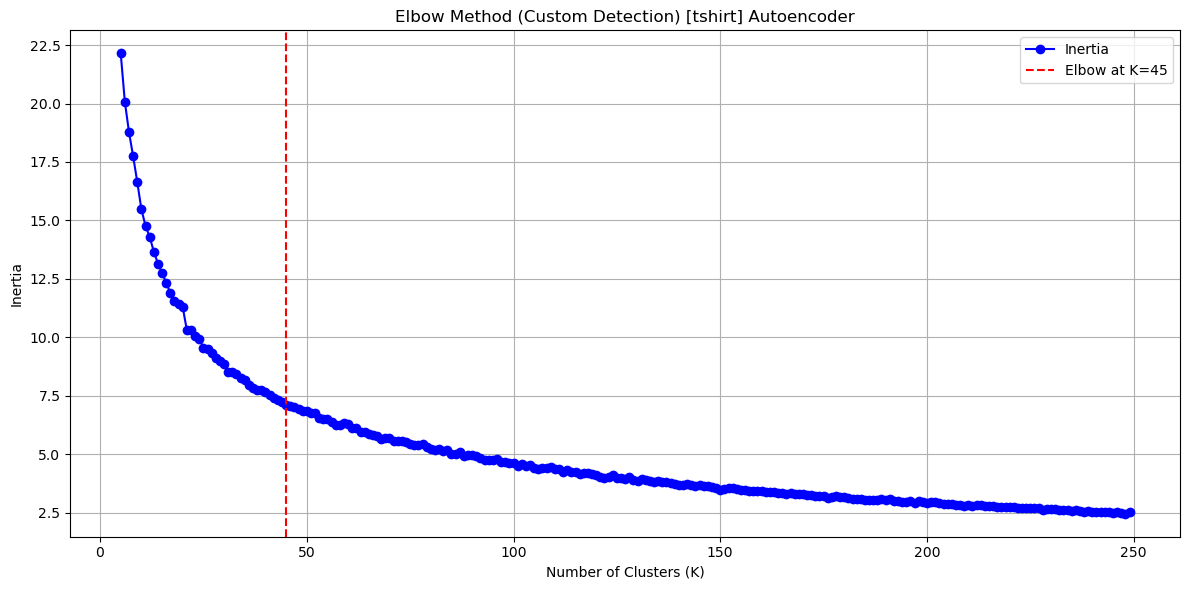

In [39]:
# Extract K values and inertia from your results
Ks = [res['k'] for res in clustering_results]
inertias = [res['inertia'] for res in clustering_results]

# Custom elbow finder using max perpendicular distance to line
def find_elbow(k_values, inertia_values):
    p1 = np.array([k_values[0], inertia_values[0]])
    p2 = np.array([k_values[-1], inertia_values[-1]])
    
    distances = []
    for i in range(len(k_values)):
        p = np.array([k_values[i], inertia_values[i]])
        d = np.abs(np.cross(p2 - p1, p1 - p)) / np.linalg.norm(p2 - p1)
        distances.append(d)
        
    elbow_index = np.argmax(distances)
    return k_values[elbow_index]

# Find elbow K
elbow_k = find_elbow(Ks, inertias)
print(f"Optimal number of clusters (elbow): K = {elbow_k}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(Ks, inertias, 'bo-', label='Inertia')
plt.axvline(x=elbow_k, color='r', linestyle='--', label=f'Elbow at K={elbow_k}')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method (Custom Detection) [tshirt] Autoencoder')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the figure
plt.figure(figsize=(12, 6))
plt.plot(Ks, inertias, 'bo-', label='Inertia')
plt.axvline(x=elbow_k, color='r', linestyle='--', label=f'Elbow at K={elbow_k}')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method (Custom Detection) [tshirt] Autoencoder')
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.savefig('elbow_method_kmeans_shoes_efficientnetb0.png', dpi=300)
plt.close()

In [43]:
tshirt_kmeans = KMeans( n_clusters = 45 )
tshirt_kmeans.fit(tshirt_embedings_df.drop(columns = ["image_path"]))

KMeans(n_clusters=45)

In [44]:
tshirt_embedings_df.drop(columns = ["image_path"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.260075,0.123916,0.075794,0.176634,0.206447,0.073208,0.0,0.514871,0.327816,0.713046,0.017919,0.152791,0.097831,0.790220,0.334106,0.220614
1,0.324516,0.217321,0.147423,0.198622,0.215397,0.151141,0.0,0.497041,0.356903,0.684663,0.034839,0.201298,0.117412,0.766031,0.355519,0.209876
2,0.416597,0.308912,0.188587,0.186756,0.202463,0.269110,0.0,0.399590,0.299397,0.571808,0.017494,0.266412,0.163251,0.648320,0.321321,0.296620
3,0.428787,0.355371,0.291344,0.207939,0.215159,0.283172,0.0,0.420618,0.336169,0.575056,0.027301,0.319616,0.158015,0.655520,0.339819,0.221994
4,0.319788,0.313338,0.274115,0.182988,0.243101,0.202505,0.0,0.425953,0.302395,0.548287,0.012658,0.336684,0.189558,0.628578,0.305808,0.247198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,0.378657,0.306280,0.223821,0.185227,0.229793,0.191507,0.0,0.409203,0.254666,0.557643,0.000787,0.315578,0.182256,0.630276,0.287283,0.278459
1795,0.373463,0.321303,0.253422,0.186086,0.228746,0.214283,0.0,0.395102,0.253477,0.524182,0.004335,0.343757,0.186376,0.599935,0.281574,0.265773
1796,0.335534,0.306332,0.232322,0.200748,0.268560,0.141137,0.0,0.445373,0.237970,0.570988,0.000285,0.339350,0.204379,0.650525,0.289524,0.269862
1797,0.372878,0.288078,0.192445,0.223532,0.260913,0.136836,0.0,0.453871,0.254038,0.601581,0.005478,0.314658,0.191360,0.686000,0.305535,0.265183


In [47]:
tshirt_embedings_df['cluster'] = tshirt_kmeans.predict( tshirt_embedings_df.drop(columns = ["image_path"]) )

In [58]:
cluster3 = tshirt_embedings_df[(tshirt_embedings_df['cluster'] == 3 )]

In [59]:
for row in cluster3['image_path'].sample(n = 15, random_state = 42):

    print(row)

C:\Users\User\Downloads\data\images\lamoda_images_tshirt\Mademan_Футболка_5193.jpg
C:\Users\User\Downloads\data\images\lamoda_images_tshirt\HENDERSON_Футболка_4458.jpg
C:\Users\User\Downloads\data\images\lamoda_images_tshirt\Replay_Футболка_8708.jpg
C:\Users\User\Downloads\data\images\lamoda_images_tshirt\adidas_Футболка_Future_Icons_3Stripes_1408.jpg
C:\Users\User\Downloads\data\images\lamoda_images_tshirt\AntonyMorato_Поло_9815.jpg
C:\Users\User\Downloads\data\images\lamoda_images_tshirt\Hugo_Футболка_Diragolino212_3661.jpg
C:\Users\User\Downloads\data\images\lamoda_images_tshirt\MM6MaisonMargiela_Футболка_7744.jpg
C:\Users\User\Downloads\data\images\lamoda_images_tshirt\Timberland_Футболка_8360.jpg
C:\Users\User\Downloads\data\images\lamoda_images_tshirt\Dickies_Футболка_LEWISTOWN_6227.jpg
C:\Users\User\Downloads\data\images\lamoda_images_tshirt\MarkFormelle_Футболка_5604.jpg
C:\Users\User\Downloads\data\images\lamoda_images_tshirt\adidasOriginals_Футболка_GRFX_TEE_2578.jpg
C:\Users

In [60]:
tshirt_embedings_df.to_csv('tshirt_embedings_df.csv.gz',compression='gzip',index = False)

## SAVE

In [61]:
fashion_conv_encoder_gap.save('fashion_conv_encoder_gap.keras')

In [62]:
from joblib import dump

dump(tshirt_kmeans,"tshirt_kmeans45.joblib")


['tshirt_kmeans45.joblib']